<a href="https://colab.research.google.com/github/PLEX-GR00T/3D-Object-Detection/blob/main/Workout_Pose_2D_(Toy_robot_side%202).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [111]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [112]:
# Upload first your data before execute these code below
path_workout = "/content/drive/MyDrive/295A/toy_robot_side_2.csv"; # change this
path_other = "/content/drive/MyDrive/295A/Negative_sample_hurt.csv"; # change this
name_class = "toy_robot_side" # change this
# change resolution if you using video with different resolution
resolution = { 
    "width": 640,
    "height": 360
}

In [113]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [114]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,853.826294,242.378769,851.785011,224.717960,843.879604,227.712994,807.549591,221.905460,812.459507,226.929817,...,828.684196,573.309174,778.118992,777.689323,793.262558,799.016647,774.210377,907.217560,787.037773,930.205879
1,872.503478,213.114142,859.626026,196.579922,858.970309,197.073169,817.523551,210.933025,816.110106,210.924846,...,818.608934,574.390819,837.537119,730.745067,827.791407,743.541751,808.562750,898.518391,782.163192,947.728069
2,866.054045,219.285068,851.545411,205.501603,849.647282,205.390436,806.786602,217.960086,807.656018,219.902255,...,796.996658,534.726060,1012.434051,483.933539,838.591773,731.725834,1193.841058,434.982917,801.963285,889.795973
3,854.500179,215.756667,839.816552,198.925237,836.060125,199.510292,798.063029,207.203021,789.016384,212.293966,...,791.432161,530.637631,815.598855,733.650570,1003.844222,592.526843,794.083778,896.286169,1174.931183,656.975671
4,865.619018,212.227575,851.034960,196.618718,846.089431,196.844004,810.781075,209.805504,799.228061,214.909233,...,817.792660,536.514239,816.792442,724.366293,864.613045,734.576844,792.571899,890.728932,877.094848,924.578269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,855.832006,225.951958,842.477382,212.903272,841.421852,212.776724,804.021444,221.800303,798.968628,222.721122,...,800.357769,551.052809,815.681727,724.086286,801.675678,742.854538,799.812999,888.193202,781.461112,962.416918
1509,856.830515,225.284604,842.749899,212.226706,841.897034,211.935381,804.037355,221.930277,799.099569,222.650122,...,801.060649,551.374709,815.562693,725.363826,801.397839,743.443348,799.969223,890.819382,781.107306,963.430955
1510,856.484007,225.498080,842.420123,212.635487,841.449344,212.380400,803.751455,222.692495,798.622533,223.508554,...,801.488832,552.636059,814.310440,727.938776,800.303388,745.657387,798.252139,858.294923,781.732432,963.179740
1511,855.747175,226.113570,842.495507,212.841745,841.414370,212.713763,803.957220,221.673008,798.844146,222.550039,...,801.850660,552.848675,813.967396,729.350266,800.069315,747.368304,798.741346,858.542307,781.888329,963.778180


In [115]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,532.308365,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,612.211568,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,659.413646,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,611.818734,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,535.062218,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [116]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,853.826294,242.378769,851.785011,224.717960,843.879604,227.712994,807.549591,221.905460,812.459507,226.929817,...,573.309174,778.118992,777.689323,793.262558,799.016647,774.210377,907.217560,787.037773,930.205879,toy_robot_side
1,872.503478,213.114142,859.626026,196.579922,858.970309,197.073169,817.523551,210.933025,816.110106,210.924846,...,574.390819,837.537119,730.745067,827.791407,743.541751,808.562750,898.518391,782.163192,947.728069,toy_robot_side
2,866.054045,219.285068,851.545411,205.501603,849.647282,205.390436,806.786602,217.960086,807.656018,219.902255,...,534.726060,1012.434051,483.933539,838.591773,731.725834,1193.841058,434.982917,801.963285,889.795973,toy_robot_side
3,854.500179,215.756667,839.816552,198.925237,836.060125,199.510292,798.063029,207.203021,789.016384,212.293966,...,530.637631,815.598855,733.650570,1003.844222,592.526843,794.083778,896.286169,1174.931183,656.975671,toy_robot_side
4,865.619018,212.227575,851.034960,196.618718,846.089431,196.844004,810.781075,209.805504,799.228061,214.909233,...,536.514239,816.792442,724.366293,864.613045,734.576844,792.571899,890.728932,877.094848,924.578269,toy_robot_side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,855.832006,225.951958,842.477382,212.903272,841.421852,212.776724,804.021444,221.800303,798.968628,222.721122,...,551.052809,815.681727,724.086286,801.675678,742.854538,799.812999,888.193202,781.461112,962.416918,toy_robot_side
1509,856.830515,225.284604,842.749899,212.226706,841.897034,211.935381,804.037355,221.930277,799.099569,222.650122,...,551.374709,815.562693,725.363826,801.397839,743.443348,799.969223,890.819382,781.107306,963.430955,toy_robot_side
1510,856.484007,225.498080,842.420123,212.635487,841.449344,212.380400,803.751455,222.692495,798.622533,223.508554,...,552.636059,814.310440,727.938776,800.303388,745.657387,798.252139,858.294923,781.732432,963.179740,toy_robot_side
1511,855.747175,226.113570,842.495507,212.841745,841.414370,212.713763,803.957220,221.673008,798.844146,222.550039,...,552.848675,813.967396,729.350266,800.069315,747.368304,798.741346,858.542307,781.888329,963.778180,toy_robot_side


In [117]:
df_workout = df_workout[:1415]
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,853.826294,242.378769,851.785011,224.717960,843.879604,227.712994,807.549591,221.905460,812.459507,226.929817,...,573.309174,778.118992,777.689323,793.262558,799.016647,774.210377,907.217560,787.037773,930.205879,toy_robot_side
1,872.503478,213.114142,859.626026,196.579922,858.970309,197.073169,817.523551,210.933025,816.110106,210.924846,...,574.390819,837.537119,730.745067,827.791407,743.541751,808.562750,898.518391,782.163192,947.728069,toy_robot_side
2,866.054045,219.285068,851.545411,205.501603,849.647282,205.390436,806.786602,217.960086,807.656018,219.902255,...,534.726060,1012.434051,483.933539,838.591773,731.725834,1193.841058,434.982917,801.963285,889.795973,toy_robot_side
3,854.500179,215.756667,839.816552,198.925237,836.060125,199.510292,798.063029,207.203021,789.016384,212.293966,...,530.637631,815.598855,733.650570,1003.844222,592.526843,794.083778,896.286169,1174.931183,656.975671,toy_robot_side
4,865.619018,212.227575,851.034960,196.618718,846.089431,196.844004,810.781075,209.805504,799.228061,214.909233,...,536.514239,816.792442,724.366293,864.613045,734.576844,792.571899,890.728932,877.094848,924.578269,toy_robot_side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,872.575672,220.442982,854.387718,205.994027,851.510422,206.302208,809.451218,219.890491,803.869840,225.374741,...,560.201143,857.144187,742.212525,820.617853,765.144501,833.873745,882.320274,801.555730,966.721682,toy_robot_side
1411,864.380031,213.017300,847.886481,196.599022,843.343478,197.025143,806.741693,206.310772,795.544729,208.933915,...,555.221496,961.090474,680.218977,834.052048,771.745248,990.747272,832.650631,808.229423,958.844753,toy_robot_side
1412,855.388221,215.994297,838.470267,197.899143,840.161589,198.765664,788.294644,214.384150,791.095485,209.996669,...,552.859529,1038.080725,526.252510,851.057911,776.905711,1228.640726,538.279225,807.194733,966.438464,toy_robot_side
1413,860.716417,220.456121,843.134648,200.534017,841.373573,203.013607,795.826736,216.705788,793.959917,225.037369,...,543.903443,1032.578680,422.927452,856.284836,773.047474,1191.498723,318.779267,811.315793,967.826987,toy_robot_side


In [118]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904,other
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337,other
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506,other
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591,other
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [119]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,853.826294,242.378769,851.785011,224.717960,843.879604,227.712994,807.549591,221.905460,812.459507,226.929817,...,573.309174,778.118992,777.689323,793.262558,799.016647,774.210377,907.217560,787.037773,930.205879,toy_robot_side
1,872.503478,213.114142,859.626026,196.579922,858.970309,197.073169,817.523551,210.933025,816.110106,210.924846,...,574.390819,837.537119,730.745067,827.791407,743.541751,808.562750,898.518391,782.163192,947.728069,toy_robot_side
2,866.054045,219.285068,851.545411,205.501603,849.647282,205.390436,806.786602,217.960086,807.656018,219.902255,...,534.726060,1012.434051,483.933539,838.591773,731.725834,1193.841058,434.982917,801.963285,889.795973,toy_robot_side
3,854.500179,215.756667,839.816552,198.925237,836.060125,199.510292,798.063029,207.203021,789.016384,212.293966,...,530.637631,815.598855,733.650570,1003.844222,592.526843,794.083778,896.286169,1174.931183,656.975671,toy_robot_side
4,865.619018,212.227575,851.034960,196.618718,846.089431,196.844004,810.781075,209.805504,799.228061,214.909233,...,536.514239,816.792442,724.366293,864.613045,734.576844,792.571899,890.728932,877.094848,924.578269,toy_robot_side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
2826,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
2827,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
2828,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [120]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [121]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,853.826294,242.378769,851.785011,224.717960,843.879604,227.712994,807.549591,221.905460,812.459507,226.929817,...,828.684196,573.309174,778.118992,777.689323,793.262558,799.016647,774.210377,907.217560,787.037773,930.205879
1,872.503478,213.114142,859.626026,196.579922,858.970309,197.073169,817.523551,210.933025,816.110106,210.924846,...,818.608934,574.390819,837.537119,730.745067,827.791407,743.541751,808.562750,898.518391,782.163192,947.728069
2,866.054045,219.285068,851.545411,205.501603,849.647282,205.390436,806.786602,217.960086,807.656018,219.902255,...,796.996658,534.726060,1012.434051,483.933539,838.591773,731.725834,1193.841058,434.982917,801.963285,889.795973
3,854.500179,215.756667,839.816552,198.925237,836.060125,199.510292,798.063029,207.203021,789.016384,212.293966,...,791.432161,530.637631,815.598855,733.650570,1003.844222,592.526843,794.083778,896.286169,1174.931183,656.975671
4,865.619018,212.227575,851.034960,196.618718,846.089431,196.844004,810.781075,209.805504,799.228061,214.909233,...,817.792660,536.514239,816.792442,724.366293,864.613045,734.576844,792.571899,890.728932,877.094848,924.578269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
2826,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
2827,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
2828,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


In [122]:
y

0       toy_robot_side
1       toy_robot_side
2       toy_robot_side
3       toy_robot_side
4       toy_robot_side
             ...      
2825             other
2826             other
2827             other
2828             other
2829             other
Name: class, Length: 2830, dtype: object

In [123]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [124]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [125]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1.334104,0.673274,1.330914,0.624217,1.318562,0.632536,1.261796,0.616404,1.269468,0.630361,...,1.294819,1.592525,1.215811,2.160248,1.239473,2.219491,1.209704,2.520049,1.229747,2.583905
1,1.363287,0.591984,1.343166,0.546055,1.342141,0.547425,1.277381,0.585925,1.275172,0.585902,...,1.279076,1.595530,1.308652,2.029847,1.293424,2.065394,1.263379,2.495884,1.222130,2.632578
2,1.353209,0.609125,1.330540,0.570838,1.327574,0.570529,1.260604,0.605445,1.261963,0.610840,...,1.245307,1.485350,1.581928,1.344260,1.310300,2.032572,1.865377,1.208286,1.253068,2.471655
3,1.335157,0.599324,1.312213,0.552570,1.306344,0.554195,1.246973,0.575564,1.232838,0.589705,...,1.236613,1.473993,1.274373,2.037918,1.568507,1.645908,1.240756,2.489684,1.835830,1.824932
4,1.352530,0.589521,1.329742,0.546163,1.322015,0.546789,1.266845,0.582793,1.248794,0.596970,...,1.277801,1.490317,1.276238,2.012129,1.350958,2.040491,1.238394,2.474247,1.370461,2.568273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,0.510612,1.083607,0.460329,1.147046,0.467996,1.178444,0.471628,1.137148,0.490829,1.187755,...,0.909140,1.093004,1.072915,0.596789,1.151071,1.060423,1.227274,0.315581,1.016659,1.341157
2826,0.478093,1.062686,0.452144,1.057624,0.444571,1.074844,0.441043,1.054116,0.457429,1.175915,...,0.906516,1.054649,1.068139,0.591206,1.173140,1.077118,1.232883,0.311352,1.011956,1.346956
2827,0.490320,1.168533,0.461769,1.154762,0.478264,1.204318,0.474831,1.121172,0.514817,1.224627,...,0.909052,1.128191,1.076949,0.626741,1.143083,1.125285,1.234721,0.295563,1.380035,1.099508
2828,0.491787,1.142435,0.469028,1.130297,0.483343,1.171735,0.480268,1.087700,0.506639,1.183456,...,0.893454,1.099659,1.070716,0.577049,1.151173,1.088440,1.243809,0.295324,1.369178,1.101079


### One Hot Encoding

In [126]:
y = pd.get_dummies(y).values
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

### Split Dataset

In [127]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [128]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 2547
The number of test data X is: 283
The number of train data y is : 2547
The number of test daya y is : 283
The total dataset is : 2830


## Modelling

In [129]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [130]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2240      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                

In [131]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [132]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [133]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 6ms/step - loss: 0.7156 - accuracy: 0.5116 - val_loss: 0.6759 - val_accuracy: 0.8516
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5913 - val_loss: 0.6323 - val_accuracy: 0.7845
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6741 - val_loss: 0.5643 - val_accuracy: 0.8693
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.7330 - val_loss: 0.4555 - val_accuracy: 0.8799
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7923 - val_loss: 0.3683 - val_accuracy: 0.9011
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8190 - val_loss: 0.2834 - val_accuracy: 0.9223
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3962 - accuracy: 0.8504 - val_loss: 0.2311 - val_accuracy: 0.9152
Epoch 8/200
4

## Visualization Acc & Loss

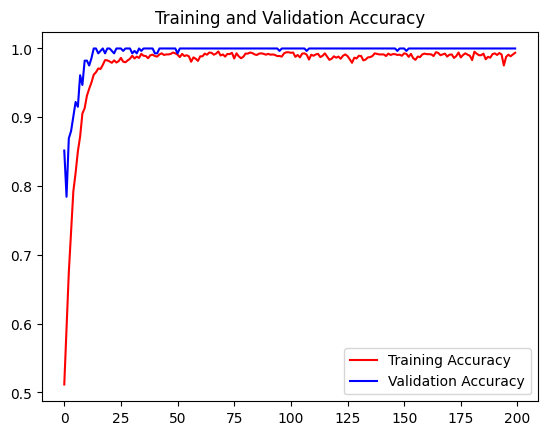

<Figure size 640x480 with 0 Axes>

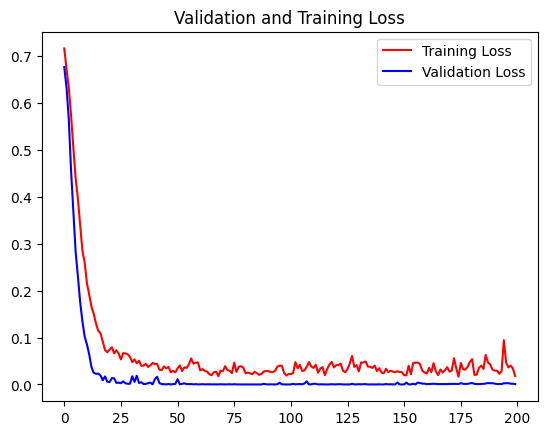

<Figure size 640x480 with 0 Axes>

In [134]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [135]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.0010390996467322111
Test accuracy: 1.0


## Test Prediction

In [136]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
891,1.371513,0.605426,1.345472,0.564273,1.332856,0.561846,1.274075,0.589572,1.258545,0.611513,...,1.286348,1.535824,1.305237,2.062718,1.278313,2.113308,1.297579,2.469608,1.253534,2.667739


In [137]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : toy_robot_side


In [138]:
df_data['class'].unique()

array(['toy_robot_side', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [139]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 57ms/step


In [140]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
toy_robot_side


## Export Model

In [141]:
# Download this file for backup
model.save("model.h5")

In [142]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2023-04-06 17:20:41.984532: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-06 17:20:41.984631: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-06 17:20:41.984659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [144]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

updating: content/tfjs_float_model_workout/ (stored 0%)
updating: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)
updating: content/tfjs_float_model_workout/model.json (deflated 78%)


Don't forget to download tfjs model (check relatable folder)